# run 6341 - graph of several double-scape or Tl photo-peaks events vs q0min



In [73]:
import time
print("Last updated on ", time.asctime())

Last updated on  Wed Nov 28 20:21:50 2018


In [74]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import os
import time
import datetime

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as md
import collections       as collections
import pandas            as pd

from   scipy import optimize
import invisible_cities.core.fit_functions as fitf
from  invisible_cities.core .core_functions import in_range

import krcal.utils.plt_functions          as krplot
import krcal.utils.hst_extend_functions   as hst

import csth.utils.pmaps         as pmapdf
import csth.utils.cepeak        as cpk
import csth.utils.cepeak_pmaps  as cpkpmap
import csth.utils.cepeak_plot   as cpkplot

In [76]:
# Plotting style
default_cmap = "jet"
figure_size  = 14, 8
font_size    = 14

plt.rcParams["figure.figsize"] =   figure_size
plt.rcParams[  "font.size"   ] =   font_size

## Events

In [77]:
ds_events    = [ 161821,  225027,  237420,  444298,  459209,  470017,  547600, 548251,  
              746892,  839311, 1179868, 1237945, 1551968, 1715200, 1784431, 2144002,
             2614906, 2950511, 3488083, 3544274, 3630533, 3745598, 3773679]
ds_locations = [ "0491", "0684", "0722", 1351, 1398, 1430, 1666, 1669, 2274, 2557, 3599, 3779,
             4740, 5242, 5457, 6563, 8017, 9061, 10730, 10900, 11173, 11526, 11618]

In [78]:
tl_events = [ 172701,  484154,  701190,  797288,  831505,  975845,  978755,
       1318857, 1324558, 1567821, 1723812, 1724205, 1820805, 1902262,
       1924001, 1926053, 2352509, 2394401, 2424537, 2520837, 2554716,
       2671606, 2759684, 2811370, 3308282, 3652165, 3758692, 3775456,
       3780397]
tl_locations =  ["0524",  1473,  2135,  2428,  2534,  2975,  2984,  4027,  4043,
        4791,  5268,  5272,  5569,  5817,  5887,  5894,  7210,  7339,
        7432,  7730,  7831,  8192,  8465,  8625, 10167, 11240, 11567,
       11619, 11639]

## load files

In [79]:
ds = False

events     = ds_events    if ds else tl_events
locations  = ds_locations if ds else tl_locations

In [80]:
run_number = 6341
tag = "trigger2_v0.9.9_20180921_krbg1300"
input_filenames  = [f"$IC_DATA/{run_number}/pmaps/trigger2/pmaps_{location}_{run_number}_{tag}.h5" for location in locations]
input_files     = [os.path.expandvars(ifile) for ifile in input_filenames]

correction_filename    = f"$IC_DATA/maps/kr_corrections_run{run_number}.h5"
correction_file        = os.path.expandvars(correction_filename)

In [81]:
def cepeak(input_filename, evt, q0min):
    
    pmaps, runinfo        = cpkpmap.data(input_filename)
    
    calibrate, xpos, ypos = cpkpmap.tools(correction_file, run_number)
    
    pmap = pmapdf.get_eventpeak(pmaps, evt, 0)
    
    epk   = cpkpmap.epeak(pmap, xpos, ypos, q0min)
    if (epk is None): 
        print('No epeak!!')
    
    cepk  = cpk.cepeak(epk, calibrate)
    
    return epk, cepk


## Total energy

In [82]:
def graph_event(cepk, blob_radius = 16., scale = 0.1):
    
    x, y, z, ene = cepk.xij, cepk.yij, cepk.zij, cepk.eij
    epoint1, epoint2, d12, eblob1, eblob2 = cpk.naiveblobs(ene, x, y, z, blob_radius = blob_radius)
    e1, x1, y1, z1 = epoint1
    e2, x2, y2, z2 = epoint2
    
    c = hst.Canvas(2, 2)
        
    hst.scatter(x, y, c=ene, s=scale*ene, alpha=0.2, canvas=c(1), cmap='jet', xylabels=('x (mm)', 'y (mm)'))
    plt.colorbar();
    ax = plt.gca()
    c1 = plt.Circle( (x1, y1), blob_radius, fill = False, color = 'black')
    c2 = plt.Circle( (x2, y2), blob_radius, fill = False, color = 'red')
    ax.add_artist(c1)
    ax.add_artist(c2)
    

    hst.scatter(z, y, c=ene, s=scale*ene, alpha=0.2, canvas=c(2), cmap='jet', xylabels=('z (mm)', 'y (mm)'))
    plt.colorbar();
    ax = plt.gca()
    c1 = plt.Circle( (z1, y1), blob_radius, fill = False, color = 'black')
    c2 = plt.Circle( (z2, y2), blob_radius, fill = False, color = 'red')
    ax.add_artist(c1)
    ax.add_artist(c2)
    
    hst.scatter(x , z, c=ene, s=scale*ene, alpha=0.2, canvas=c(3), cmap='jet', xylabels=('x (mm)', 'z (mm)'))
    plt.colorbar();
    ax = plt.gca()
    c1 = plt.Circle( (x1, z1), blob_radius, fill = False, color = 'black')
    c2 = plt.Circle( (x2, z2), blob_radius, fill = False, color = 'red')
    ax.add_artist(c1)
    ax.add_artist(c2)


    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.gcf()
    ax3D = fig.add_subplot(224, projection='3d')
    p3d = ax3D.scatter(z, x, y, s=scale*ene, c=ene, alpha=0.4, marker='o')
    ax3D.set_xlabel('z (mm)')
    ax3D.set_ylabel('x (mm)')
    ax3D.set_zlabel('y (mm)')

    plt.tight_layout()
    


In [83]:
ds_ilocs = 0, 1, 3, 4, 5, 8   # best 5, 3, 4 single 8
tl_ilocs = 0, 3, 6, 9         # best 9

In [84]:
iloc = 9
evt   = events[iloc]
ifile = input_files[iloc]

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5
epoint1  (4815.959538255119, 85.0, -165.0, 495.02753) 120188.41660439692
epoint2  (7396.264591578507, 135.0, -105.0, 423.92163) 86387.89014006694


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


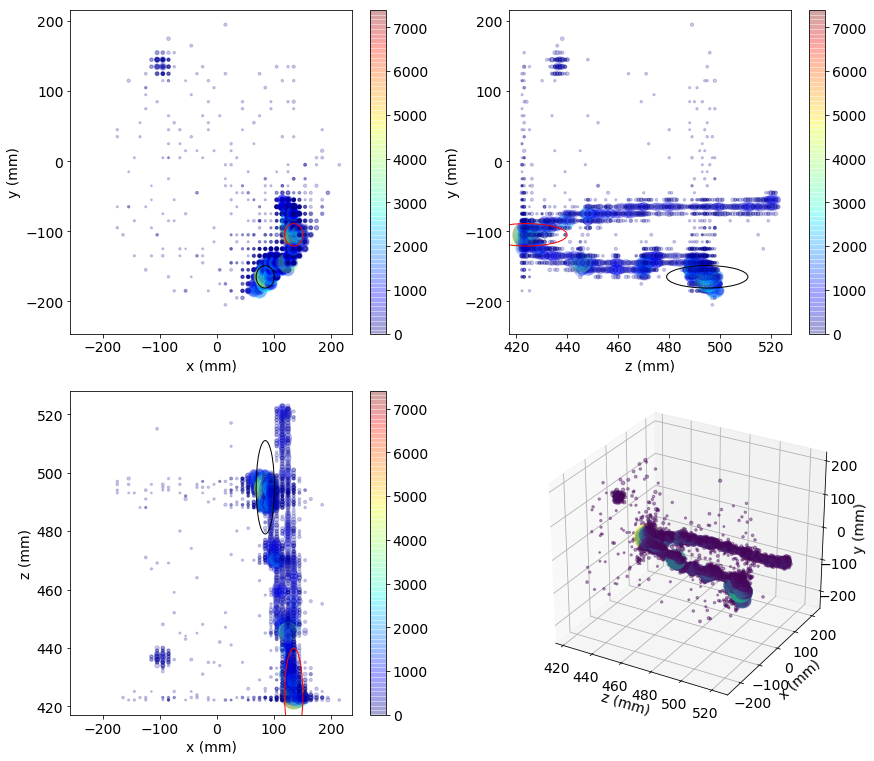

In [86]:
q0min = 3.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)
#cpkplot.graph_event(cepk.xij, cepk.yij, cepk.zij, cepk.eij)

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5
epoint1  (5526.576647921286, 85.0, -165.0, 495.02753) 136191.32382173053
epoint2  (8354.646859670927, 135.0, -105.0, 423.92163) 98674.33828479791


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


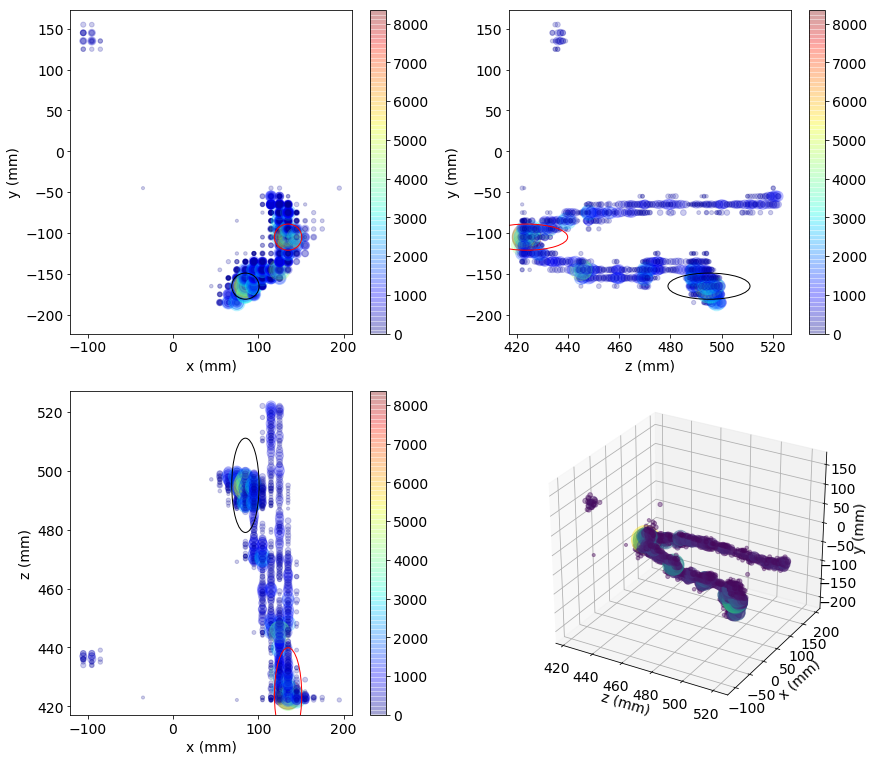

In [87]:
q0min = 6.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)


processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5
epoint1  (5690.681839193856, 85.0, -165.0, 495.02753) 142618.49191355676
epoint2  (8773.09755055926, 135.0, -105.0, 423.92163) 104504.8607681835


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


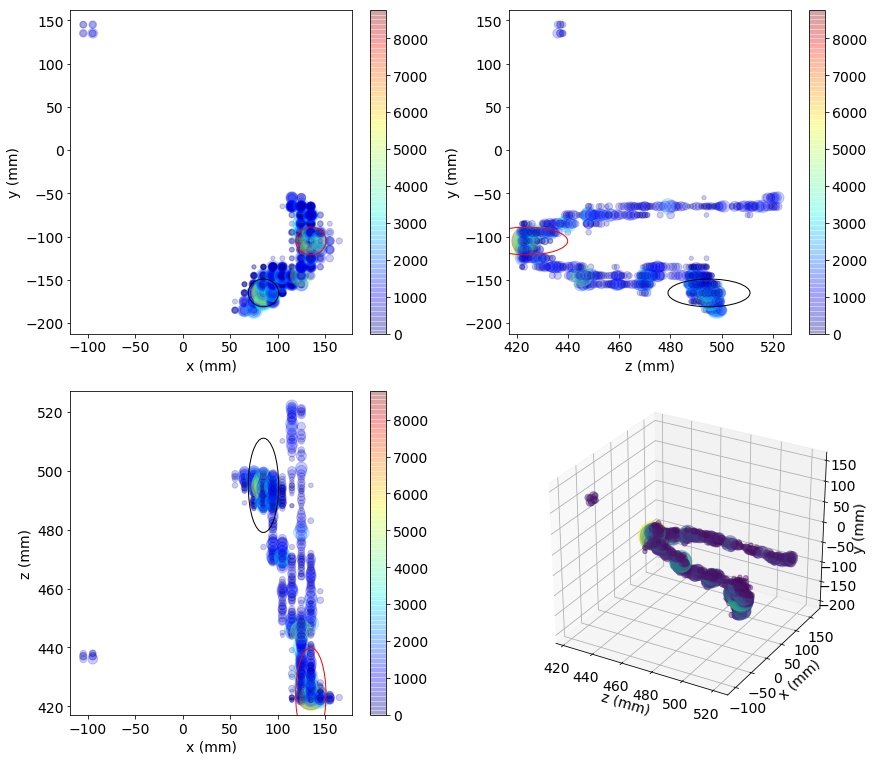

In [88]:
q0min = 9.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5
epoint1  (6001.205234133104, 85.0, -165.0, 495.02753) 145653.62609934664
epoint2  (9499.82849842542, 135.0, -105.0, 423.92163) 109086.32294461314


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


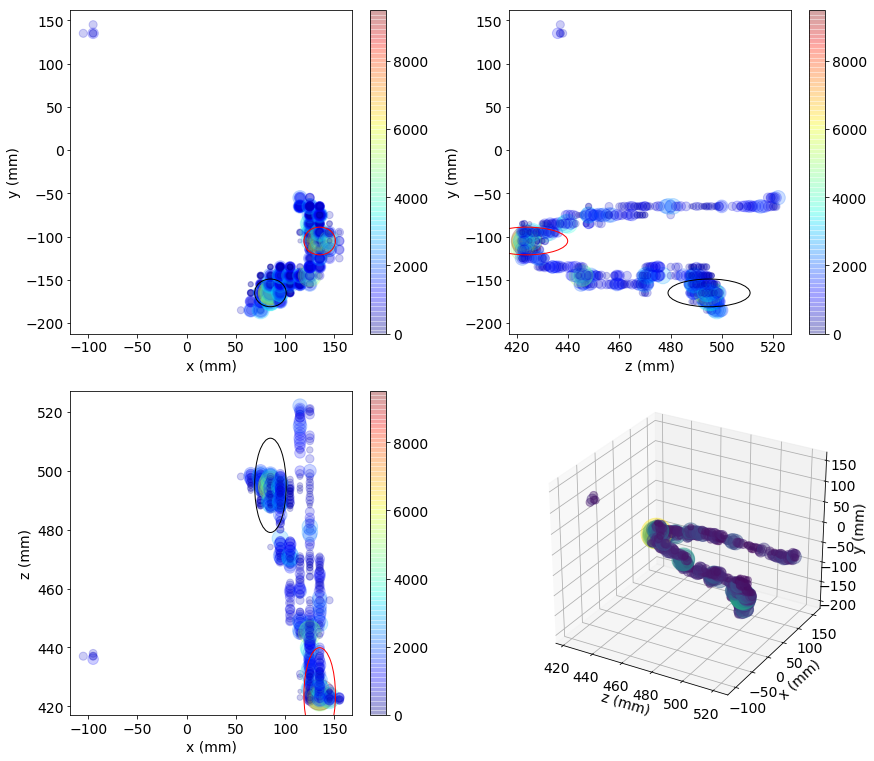

In [89]:
q0min = 12.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


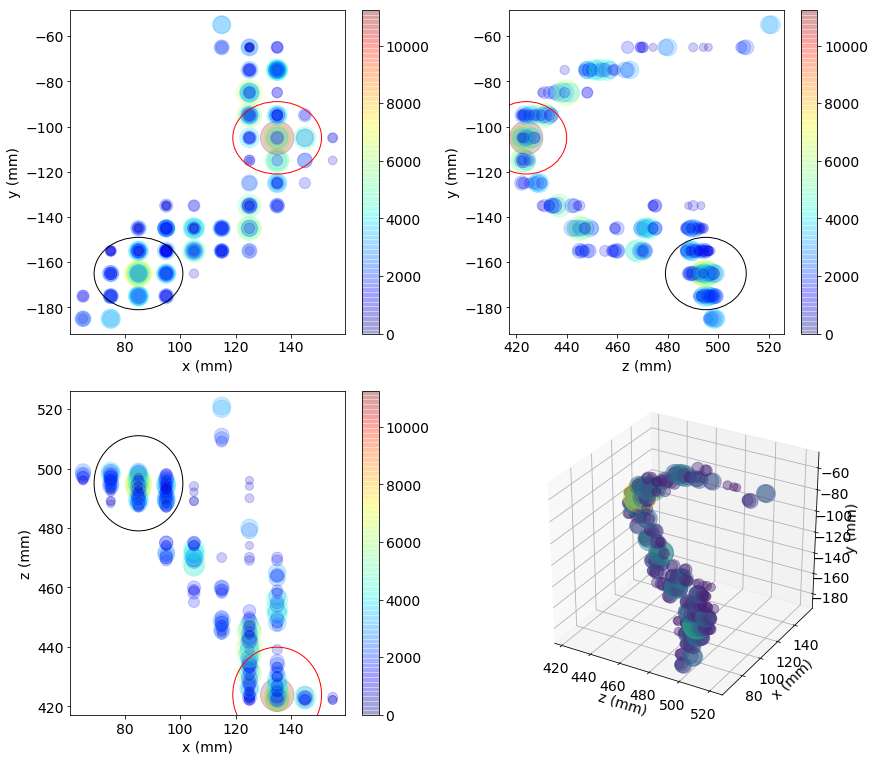

In [94]:
q0min = 24.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)

processing  /Users/hernando/investigacion/NEXT/data/runIV//6341/pmaps/trigger2/pmaps_4791_6341_trigger2_v0.9.9_20180921_krbg1300.h5
epoint1  (11902.631767774381, 135.0, -105.0, 423.92163) 117367.56218903563
epoint2  (7348.286519561868, 85.0, -165.0, 494.04968) 172991.80965702064


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


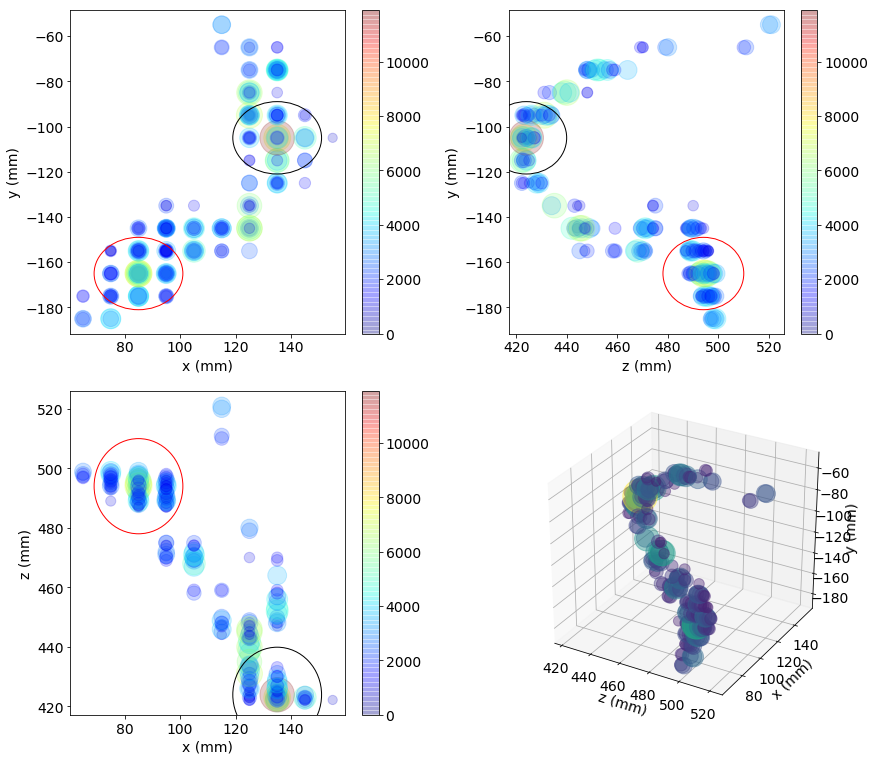

In [93]:
q0min = 30.

epk, cepk = cepeak(ifile, evt, q0min)
graph_event(cepk)